# importing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import sklearn
import tensorflow as tf
!pip install plotly
import plotly.express as px

In [ ]:
df = pd.read_csv("cervical-cancer.csv")

# EDA

In [ ]:
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
831,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
832,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
833,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number of sexual partners           810 non-null    float64
 2   First sexual intercourse            828 non-null    float64
 3   Num of pregnancies                  779 non-null    float64
 4   Smokes                              822 non-null    float64
 5   Smokes (years)                      822 non-null    float64
 6   Smokes (packs/year)                 822 non-null    float64
 7   Hormonal Contraceptives             732 non-null    float64
 8   Hormonal Contraceptives (years)     732 non-null    float64
 9   IUD                                 723 non-null    float64
 10  IUD (years)                         723 non-null    float64
 11  STDs                                735 non-n

In [ ]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,835.000000,810.000000,828.000000,779.000000,822.000000,822.000000,822.000000,732.000000,732.000000,723.000000,...,71.000000,71.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,27.023952,2.551852,17.020531,2.304236,0.149635,1.253850,0.465823,0.651639,2.302916,0.114799,...,6.140845,5.816901,0.021557,0.010778,0.021557,0.028743,0.041916,0.087425,0.051497,0.064671
std,8.482986,1.676686,2.817000,1.455817,0.356930,4.140727,2.256273,0.476777,3.794180,0.319000,...,5.895024,5.755271,0.145319,0.103320,0.145319,0.167182,0.200518,0.282626,0.221142,0.246091
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df = df.replace('?',np.nan)
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
831,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
832,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
833,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [ ]:
df.isnull().sum()

,0
Age,0
Number of sexual partners,25
First sexual intercourse,7
Num of pregnancies,56
Smokes,13
Smokes (years),13
Smokes (packs/year),13
Hormonal Contraceptives,103
Hormonal Contraceptives (years),103
IUD,112


In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

<Axes: >

In [ ]:
df = df.drop(columns = ['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])
df

In [ ]:
df = df.apply(pd.to_numeric)
df.info()

In [ ]:
df.describe()

In [ ]:
mean_data = df.mean()

In [ ]:
df = df.fillna(mean_data)

In [ ]:
df.isnull().sum()

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df['Age'].min()

In [ ]:
df['Age'].max()

In [ ]:
df[df['Age'] == 84]

# Visualization

In [ ]:
corr_matrix = df.corr()
corr_matrix

In [ ]:
plt.figure(figsize=(20,20))

sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')


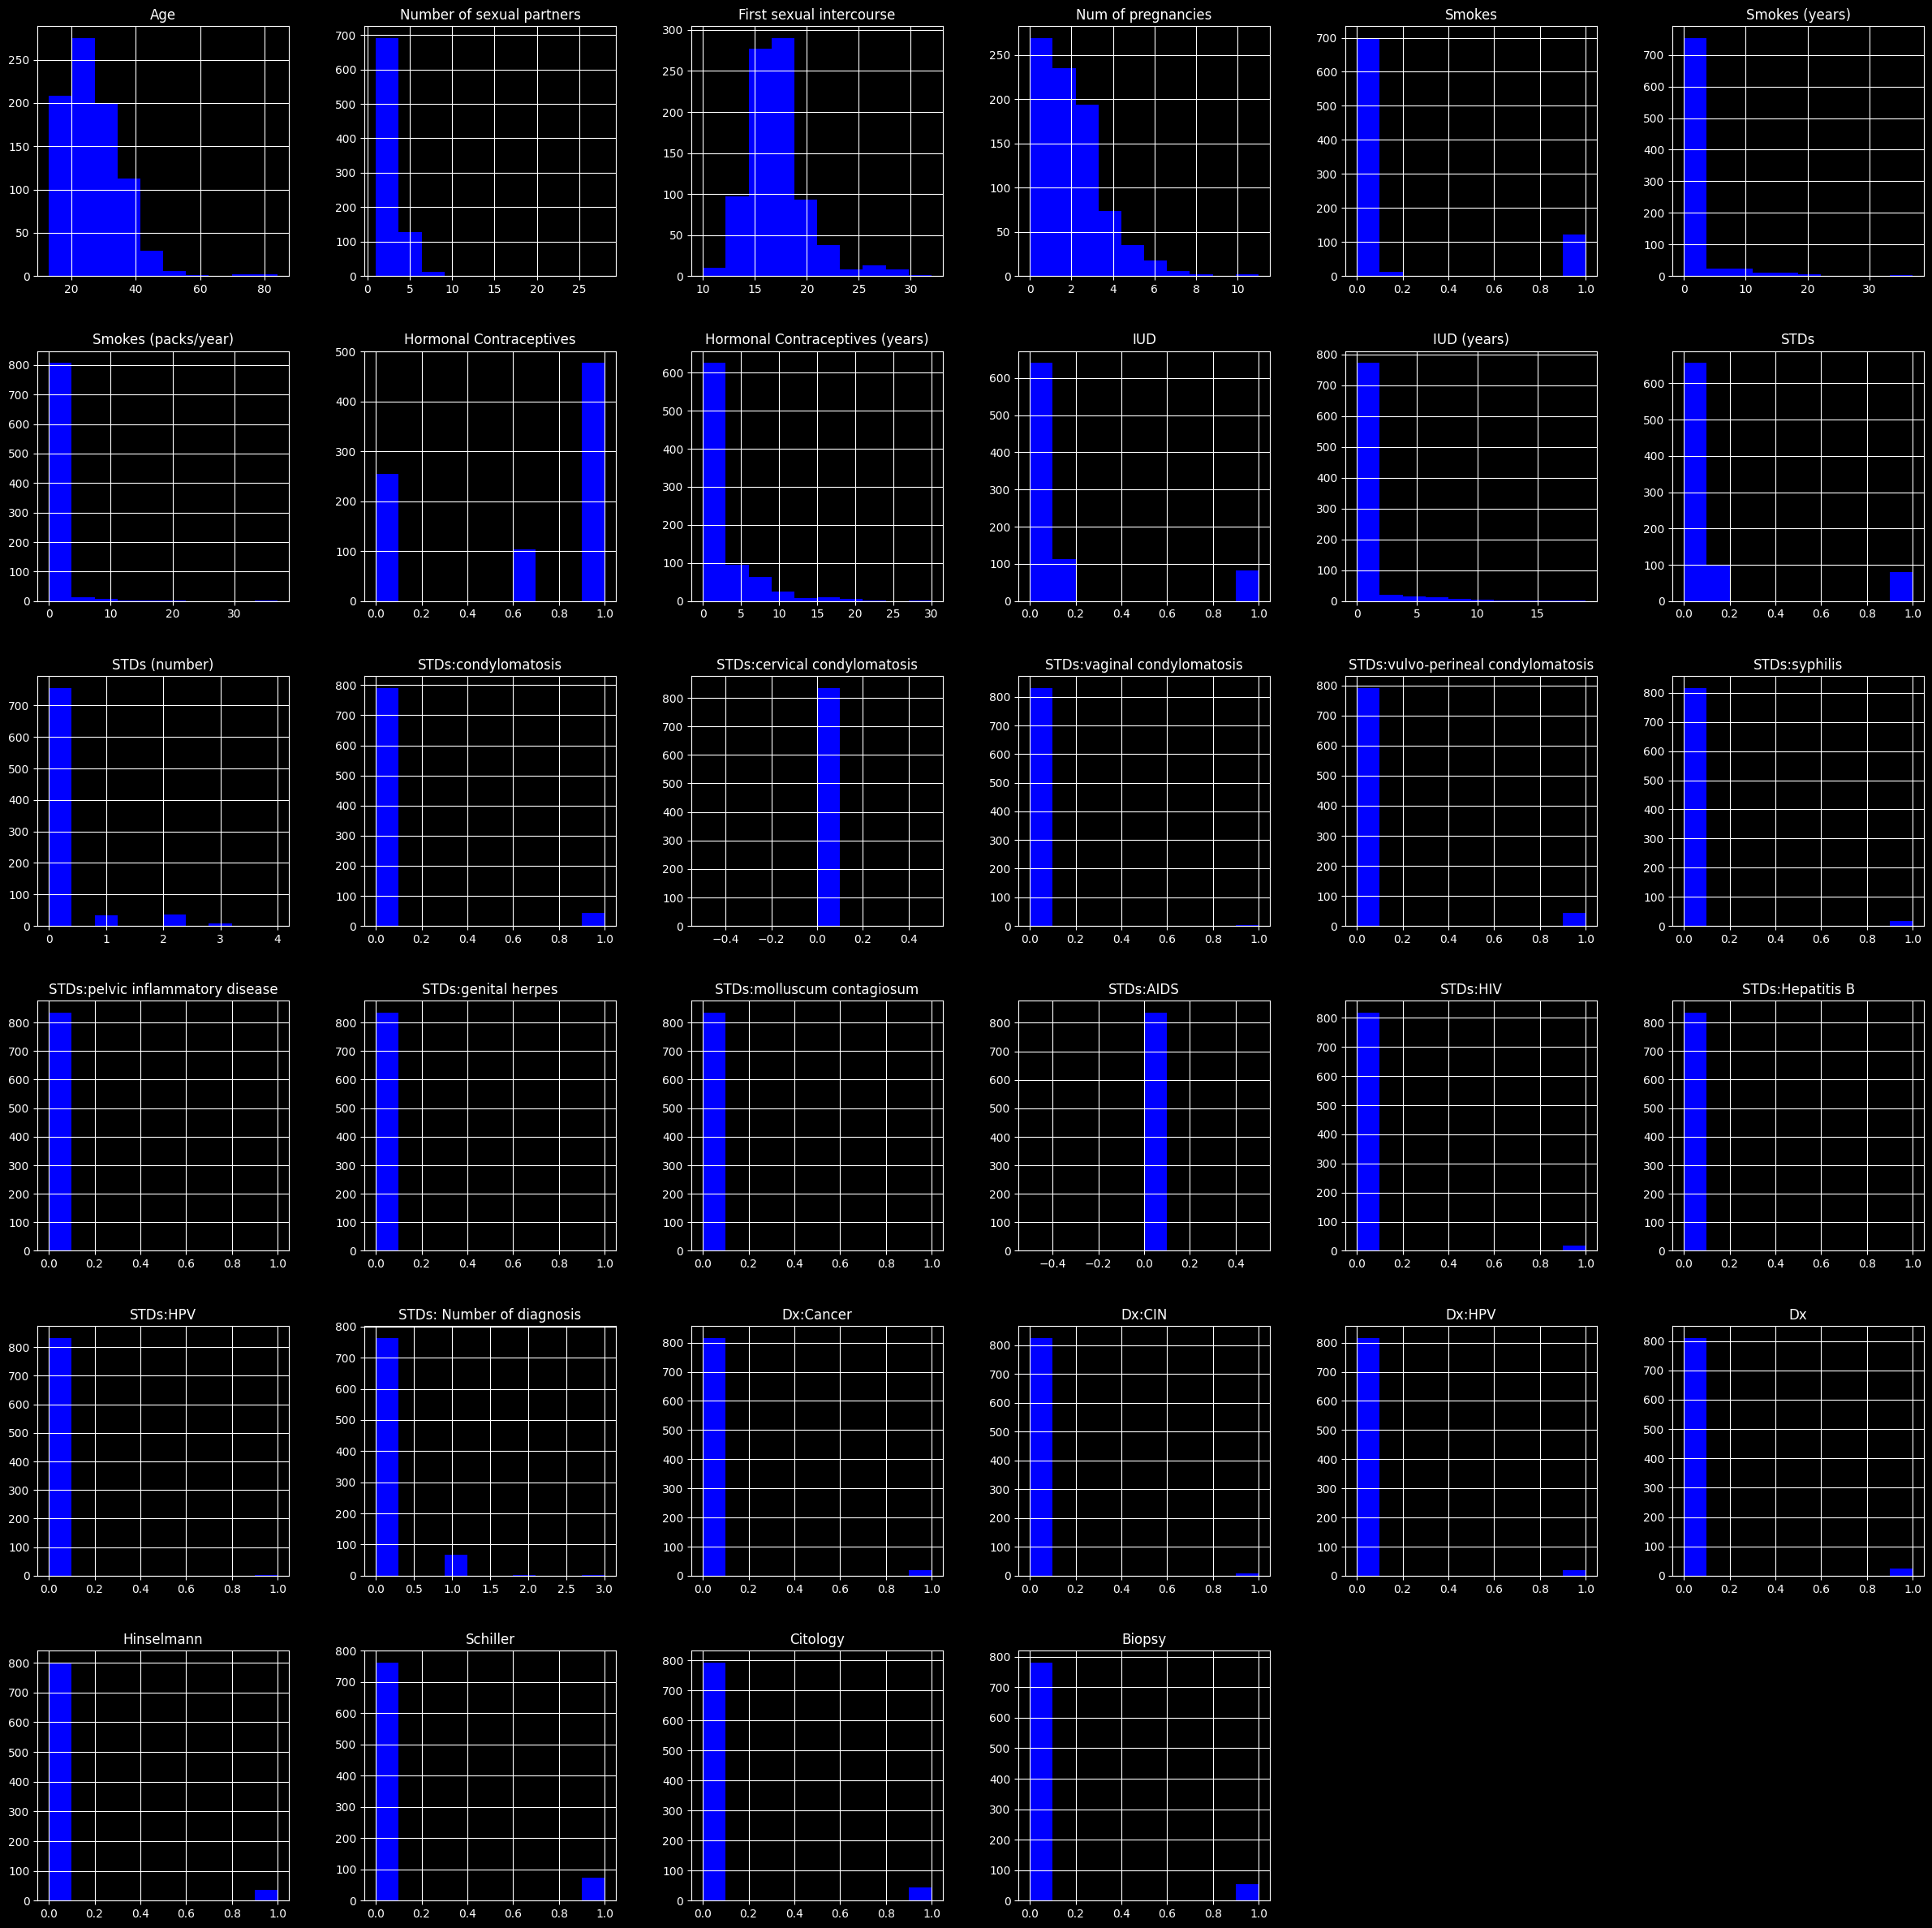

In [ ]:
df.hist(bins = 10, color = 'b',figsize=(30,30))
plt.style.use('dark_background')

# Preparing data set for training

In [ ]:
target_df = df['Biopsy']
target_df

,Biopsy
0,0
1,0
2,0
3,0
4,0
...,...
830,0
831,0
832,0
833,0


In [ ]:
input_df = df.drop(columns = ['Biopsy'])
input_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,18,4.0,15.000000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
1,15,1.0,14.000000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2,34,1.0,17.020531,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
3,52,5.0,16.000000,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0.0,0,1,0,1,0,0,0,0
4,46,3.0,21.000000,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,34,3.0,18.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
831,32,2.0,19.000000,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
832,25,2.0,17.000000,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0,0,0,0,0,0,0,1
833,33,2.0,24.000000,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0


In [ ]:
x = np.array(input_df).astype('float32')
y = np.array(target_df).astype('float32')

In [ ]:
y.shape

(835,)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
x

array([[-1.0644083e+00,  8.7746584e-01, -7.2072434e-01, ...,
        -2.0916502e-01, -3.0951661e-01, -2.3300843e-01],
       [-1.4182693e+00, -9.4030231e-01, -1.0774248e+00, ...,
        -2.0916502e-01, -3.0951661e-01, -2.3300843e-01],
       [ 8.2285047e-01, -9.4030231e-01, -2.4769702e-07, ...,
        -2.0916502e-01, -3.0951661e-01, -2.3300843e-01],
       ...,
       [-2.3873256e-01, -3.3437958e-01, -7.3235566e-03, ...,
        -2.0916502e-01, -3.0951661e-01,  4.2916903e+00],
       [ 7.0489675e-01, -3.3437958e-01,  2.4895792e+00, ...,
        -2.0916502e-01, -3.0951661e-01, -2.3300843e-01],
       [ 2.3308209e-01, -3.3437958e-01,  1.0627776e+00, ...,
        -2.0916502e-01, -3.0951661e-01, -2.3300843e-01]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_test,x_val,y_test,y_val = train_test_split(x_test,y_test,test_size=0.5)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

# Training

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBClassifier(learning_rate = 0.1,max_depth =5 ,n_estimators = 10)
model.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
result_train = model.score(x_train,y_train)
result_train

0.9552715654952076

In [ ]:
result_test = model.score(x_test,y_test)
result_test

0.9282296650717703

In [ ]:
y_preadict = model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_preadict))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       195
         1.0       0.00      0.00      0.00        14

    accuracy                           0.93       209
   macro avg       0.47      0.50      0.48       209
weighted avg       0.87      0.93      0.90       209



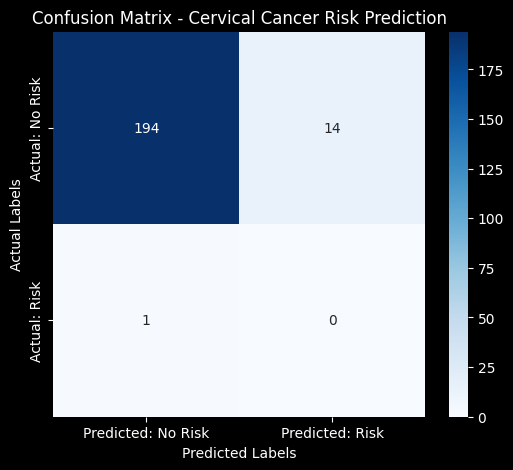

In [ ]:
cm = confusion_matrix(y_preadict,y_test)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted: No Risk', 'Predicted: Risk'],
            yticklabels=['Actual: No Risk', 'Actual: Risk'])

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Cervical Cancer Risk Prediction')
plt.show()